In [1]:
# Read webscraping_results_assignmnet3.csv file 
import pandas as pd
dataframe=pd.read_csv('webscraping_results_assignmnet3.csv')
dataframe.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Science Graduate (Canada),Novo Nordisk,Canada,4.1,PostedPosted 23 days ago,NaN,About the Data Science Graduate Programme*.\nT...,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Data Science Graduate: Kick-start your global ...
1,Junior Data Analyst,Fasken SLP,"Vancouver, BC",3.4,PostedPosted 8 days ago,NaN,Minimum 1 - 3 years of experience in data anal...,https://ca.indeed.com/rc/clk?jk=cbfc10a2597819...,Who We Are\nFasken is a leading international ...
2,Senior Performance and Data Analyst,The City of Vancouver,"Remote in Vancouver, BC",3.7,PostedPosted 13 days ago,"$102,256–$127,830 a year",This role will partner closely with other Corp...,https://ca.indeed.com/rc/clk?jk=a26169afa32d14...,Requisition ID: 37420\n\n\nCompany\nLocated on...
3,Senior Data Scientist,Mastercard,"Vancouver, BC",4.0,PostedPosted 30+ days ago,NaN,Experience applying data science in the digita...,https://ca.indeed.com/rc/clk?jk=b8c751fef506c2...,Our Purpose\nWe work to connect and power an i...
4,Data Scientist,Minpraxis Solutions Ltd.,"Hybrid remote in Vancouver, BC",NaN,PostedPosted 30+ days ago,"$6,600–$7,500 a month",Working knowledge of data science languages su...,https://ca.indeed.com/company/Minpraxis-Soluti...,About Us\nMinpraxis Solutions focuses on trans...


In [2]:
dataframe.shape

(1289, 9)

In [3]:
# 2. Exploratory data analysis and feature engineering:

keywords = ['active','accountability','decision','Planning','writing','speaking',
            'thinking','Coordination','Innovation','Experimentation','intelligence','Responsible',
            'Discipline','Flexible','accuracy','Quality','Strategic','design','Time','communication',
            'presentation','problem', 'solving','project','management','leadership','autonomous',
            'benefitsforeveryworld','aspirational','assistance','assumptions', 'assurance','arrangements',
            'analytics','affecting','agile','agreement','adjusting','advanced','advertising', 'advice', 'advise',
            'Data','computational','Machine','math','MATLAB','Studio',
            'Excel','Python','SQL','Hadoop','Spark','debug','database',
            'datacloud','financial','language','models','nlp','pandas',
            'programming','sklearn','Analysis','algorithms', 'algorithmic',
             'applicants','automate','bioinformatics','biology','biomedical','business','ccpa']

# keywords = ['writing','responsible','design','data','computational','machine',
#            'sql','spark','models','pandas','analysis']
keywords_lower = [x.lower() for x in keywords]
keywords_lower


#Bag-of-words using count vectorization (TF)
from sklearn.feature_extraction.text import CountVectorizer
#token_pattern=r'\b[a-zA-Z]{3,}\b' exclude anything that has numbers in it.
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b',stop_words='english')
X = vectorizer.fit_transform(dataframe['Descriptions'])
#in matrix form 
tf=pd.DataFrame(X.toarray(), 
             columns=vectorizer.get_feature_names())

tf_new = tf[keywords_lower]
tf_new.head()

/Users/chelseali/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,active,accountability,decision,planning,writing,speaking,thinking,coordination,innovation,experimentation,...,analysis,algorithms,algorithmic,applicants,automate,bioinformatics,biology,biomedical,business,ccpa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,5,0
2,0,2,3,2,0,0,1,0,0,0,...,6,0,0,2,0,0,0,0,18,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,0,0,0,0,0


In [4]:
# Hard skill is from keywords[42]

In [5]:
tf_new.sum()

active              97
accountability       8
decision           124
planning           583
writing            559
                  ... 
bioinformatics      62
biology             83
biomedical          79
business          1067
ccpa                83
Length: 73, dtype: int64

In [6]:
dataframe_new = dataframe[['Title','Company','Location','Rating','Salary']]
data = (dataframe_new, tf_new)
data = pd.concat(data,axis = 1)
data.head()

,Title,Company,Location,Rating,Salary,active,accountability,decision,planning,writing,...,analysis,algorithms,algorithmic,applicants,automate,bioinformatics,biology,biomedical,business,ccpa
0,Data Science Graduate (Canada),Novo Nordisk,Canada,4.1,NaN,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Junior Data Analyst,Fasken SLP,"Vancouver, BC",3.4,NaN,0,0,1,0,1,...,1,0,0,1,0,0,0,0,5,0
2,Senior Performance and Data Analyst,The City of Vancouver,"Remote in Vancouver, BC",3.7,"$102,256–$127,830 a year",0,2,3,2,0,...,6,0,0,2,0,0,0,0,18,0
3,Senior Data Scientist,Mastercard,"Vancouver, BC",4.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,Data Scientist,Minpraxis Solutions Ltd.,"Hybrid remote in Vancouver, BC",NaN,"$6,600–$7,500 a month",0,0,0,0,0,...,4,2,0,0,0,0,0,0,0,0


In [7]:
# Select columns of hard skills
data_hard = data.iloc[:,47:]

# Select columns of soft skills
data_soft = data.iloc[:,5:47]

# Select columns of hard and soft skills
data_all = data.iloc[:,5:]

In [8]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

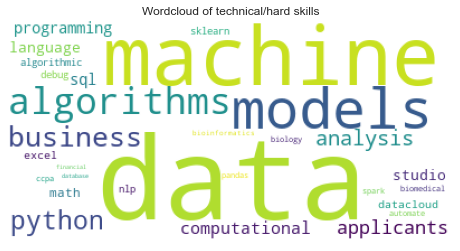

In [166]:
# Wordcloud of technical/hard skills
data_hard.T.sum(axis=1)
Cloud_hard= WordCloud(background_color="white", max_words=50).generate_from_frequencies(data_hard.T.sum(axis=1))
plt.imshow(Cloud_hard)
plt.axis("off")
plt.title("Wordcloud of technical/hard skills")
plt.show()

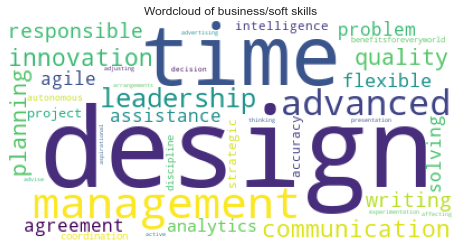

In [167]:
# Wordcloud of business/soft skills
data_soft.T.sum(axis=1)
Cloud_soft= WordCloud(background_color="white", max_words=50).generate_from_frequencies(data_soft.T.sum(axis=1))
plt.imshow(Cloud_soft)
plt.axis("off")
plt.title("Wordcloud of business/soft skills")
plt.show()

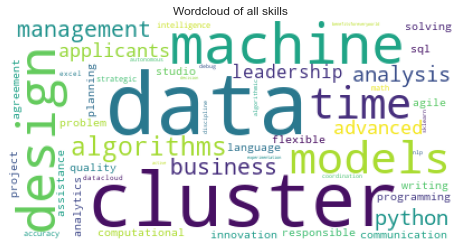

In [168]:
# Wordcloud of all skills
data_all.T.sum(axis=1)
Cloud_all= WordCloud(background_color="white", max_words=50).generate_from_frequencies(data_all.T.sum(axis=1))
plt.imshow(Cloud_all)
plt.axis("off")
plt.title("Wordcloud of all skills")
plt.show()

In [12]:
# 3. Hierarchical clustering implementation

import numpy as np
from scipy.spatial.distance import euclidean
# Empty matrix is fill
D = np.zeros([data_all.shape[1],data_all.shape[1]])

# Find all elements differences
for k in range(data_all.shape[0]):
    D1 = np.zeros([data_all.shape[1],data_all.shape[1]])
    for i in range(data_all.shape[1]):
        for j in range(data_all.shape[1]):
#             D[i,j] = abs(data_all.iloc[k][i]-data_all.iloc[k][j]) 
            D1[i,j] = euclidean(data_all.iloc[k][i],data_all.iloc[k][j])
    D = D1+D

/var/folders/zj/8j4474490n7343g8d37vgf4r0000gn/T/ipykernel_74518/634294267.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='centroid',metric="euclidean")


[]

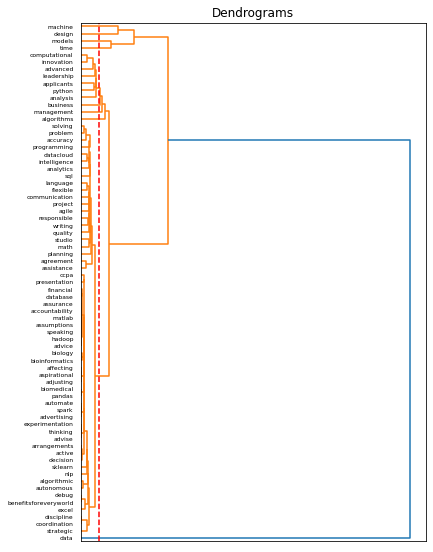

In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np
Y = sch.linkage(D, method='centroid',metric="euclidean")

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = sch.dendrogram(Y, orientation='right')

labels = data_all.columns[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)
plt.title("Dendrograms") 
plt.axvline(x=3000, color='r', linestyle='--')
plt.plot()

In [14]:
# Decide about a number of clusters that you would like to select keeping in mind that you 
# need  to  design  a  sequence  of  8-12  courses.  Justify  and  explain  your  clusters  in  one paragraph. 

## After locating the vertical line, I count how many times horizontal lines were crossed by it :10 times. So 10 seems a good indication of the number of clusters that have the most distance between them.

In [15]:
labels_h = sch.fcluster(Y, 0.8*D.max(), 'distance')
# data_all_h = data_all.copy()
# data_all_h["hier_Clusters"]=labels_h-1

In [16]:
# 4. (a) Implement k-means clustering algorithm

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

from sklearn.datasets import make_blobs
! pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [18]:
# Decide about a number of clusters that you would like to select keeping in mind that you 
# need to design a sequence of 8-12 courses. For instance, you can use the elbow method to 
# determine  the  optimal  number  of  clusters  for  k-means  clustering 

I want to have 11 clusters, which is consistent with that we are asked to design 8 to 12 courses.

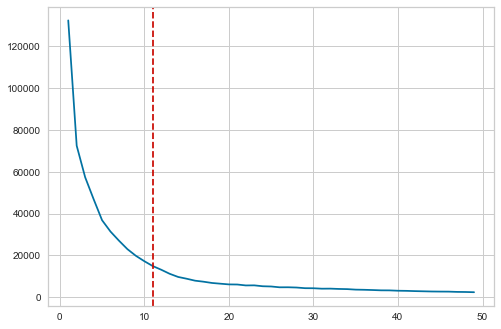

In [19]:
wcss = []

for i in range(1, 50):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(data_all)
    wcss.append(clustering.inertia_)
    
ks = [i for i in range(1,50)]
sns.lineplot(x=ks,y=wcss)
plt.axvline(x=11, color='r', linestyle='--')

Based on the plot, as the number of clusters is 11, the sum squared distances is around 19000. This is small enough.

In [20]:
# Apply K-Means Algorithm
model = KMeans(11) # Since there are 11 clusters

# Train model
model.fit(data_all)
label = model.labels_

data_all['cluster'] = label
data_all.head()

,active,accountability,decision,planning,writing,speaking,thinking,coordination,innovation,experimentation,...,algorithms,algorithmic,applicants,automate,bioinformatics,biology,biomedical,business,ccpa,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,5,0,1
2,0,2,3,2,0,0,1,0,0,0,...,0,0,2,0,0,0,0,18,0,1
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,3,0,1
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,7


y axis is the Within Clusters Sum of Squares (WCSS) for each number of clusters.
Based on the plot, I choose 11 culsters.

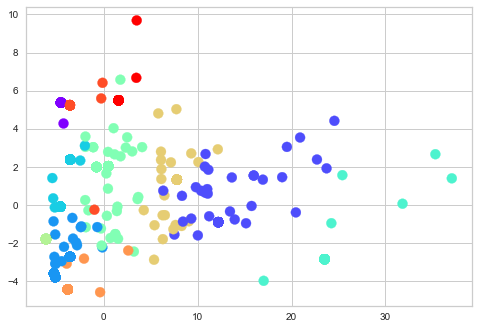

In [21]:
from sklearn.decomposition import PCA
x = data_all.iloc[:,:-1]
data_pca = PCA(2).fit_transform(x)
cluster_y = data_all.iloc[:,-1]
plt.scatter(data_pca[:, 0], data_pca[:, 1],c = cluster_y, s = 100, cmap = 'rainbow')

In [22]:
# 5.

In [23]:
# Separately  visualize  course  curricula  (course  names  and  topics  taught  in  each  course)  from 
# Section 3 (hierarchical clustering algorithm) and from Section 4 (second clustering algorithm).
# For each course include 3-8 topics (based on skills) that should be taught in each course. 

Visualize part 3

In [153]:
curricula_p3 = {'Course_a1': ['machine','design','models','time'],
               'Course_a2': ['computational','innovation','advanced','leadership'],
               'Course_a3': ['applicants','python','analysis'],
               'Course_a4': ['business','management','algorithms'],
               'Course_a5': ['programming','datacloud','intelligence'],
               'Course_a6': ['communication','project','writing','speaking'],
               'Course_a7': ['hadoop','studio','math'],
               'Course_a8': ['financial','presentation','coordination'],
               'Course_a9': ['communication','project','data'],
               'Course_a10': ['sql','excel','matlab','spark']}

(1289, 4)


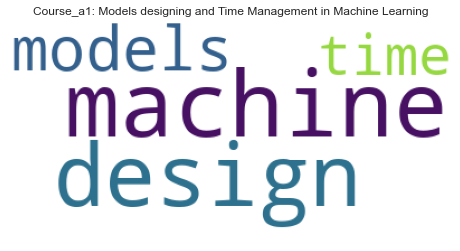

In [133]:
data_a1 = data_all[curricula_p3['Course_a1']]
print(data_a1.shape)

Cloud_a1= WordCloud(background_color="white", max_words=4).generate_from_frequencies(data_a1.T.sum(axis=1))
plt.imshow(Cloud_a1)
plt.imshow(Cloud_a1)
plt.axis("off")
plt.title("Course_a1: Models designing and Time Management in Machine Learning")
plt.show()
# This course's name is:
Course_a1 = 'Models designing and Time Management in Machine Learning'
# This course focus on these topics:
Course_a1_topics = ['machine','design','models','time']

(1289, 4)


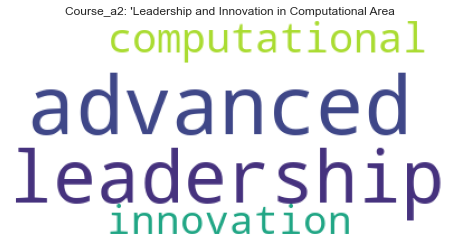

In [139]:
data_a2 = data_all[curricula_p3['Course_a2']]
print(data_a2.shape)

Cloud_a2= WordCloud(background_color="white", max_words=4).generate_from_frequencies(data_a2.T.sum(axis=1))
plt.imshow(Cloud_a2)
plt.imshow(Cloud_a2)
plt.axis("off")
plt.title("Course_a2: 'Leadership and Innovation in Computational Area")
plt.show()
# This course's name is:
Course_a2 = 'Leadership and Innovation in Computational Area'
# This course focus on these topics:
Course_a2_topics = ['computational','innovation','advanced','leadership']

(1289, 3)


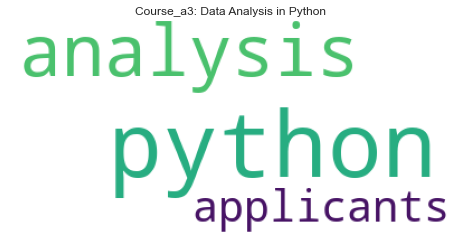

In [140]:
data_a3 = data_all[curricula_p3['Course_a3']]
print(data_a3.shape)

Cloud_a3= WordCloud(background_color="white", max_words=3).generate_from_frequencies(data_a3.T.sum(axis=1))
plt.imshow(Cloud_a3)
plt.imshow(Cloud_a3)
plt.axis("off")
plt.title("Course_a3: Data Analysis in Python")
plt.show()
# This course's name is:
Course_a3 = 'Data Analysis in Python'
# This course focus on these topics:
Course_a3_topics = ['applicants','python','analysis']

(1289, 3)


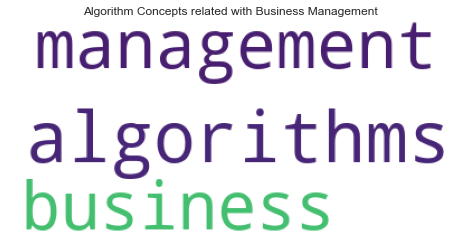

In [144]:
data_a4 = data_all[curricula_p3['Course_a4']]
print(data_a4.shape)

Cloud_a4= WordCloud(background_color="white", max_words=3).generate_from_frequencies(data_a4.T.sum(axis=1))
plt.imshow(Cloud_a4)
plt.imshow(Cloud_a4)
plt.axis("off")
plt.title("Algorithm Concepts related with Business Management")
plt.show()
# This course's name is:
Course_a4 = 'Algorithm Concepts related with Business Management'
# This course focus on these topics:
Course_a4_topics = ['business','management','algorithms']

(1289, 3)


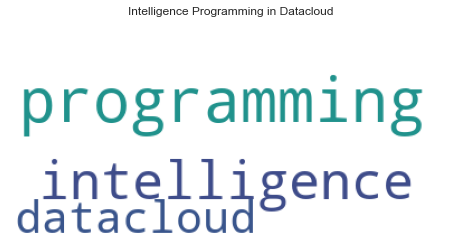

In [145]:
data_a5 = data_all[curricula_p3['Course_a5']]
print(data_a5.shape)

Cloud_a5= WordCloud(background_color="white", max_words=3).generate_from_frequencies(data_a5.T.sum(axis=1))
plt.imshow(Cloud_a5)
plt.imshow(Cloud_a5)
plt.axis("off")
plt.title("Intelligence Programming in Datacloud")
plt.show()
# This course's name is:
Course_a5 = 'Intelligence Programming in Datacloud'
# This course focus on these topics:
Course_a5_topics = ['programming','datacloud','intelligence']

(1289, 4)


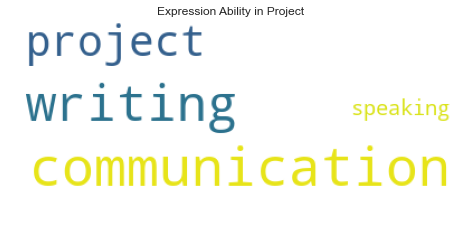

In [147]:
data_a6 = data_all[curricula_p3['Course_a6']]
print(data_a6.shape)

Cloud_a6= WordCloud(background_color="white", max_words=4).generate_from_frequencies(data_a6.T.sum(axis=1))
plt.imshow(Cloud_a6)
plt.imshow(Cloud_a6)
plt.axis("off")
plt.title("Expression Ability in Project")
plt.show()
# This course's name is:
Course_a6 = 'Expression Ability in Project'
# This course focus on these topics:
Course_a6_topics = ['communication','project','writing','speaking']

(1289, 3)


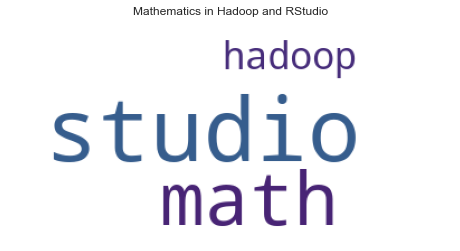

In [151]:
data_a7 = data_all[curricula_p3['Course_a7']]
print(data_a7.shape)

Cloud_a7= WordCloud(background_color="white", max_words=3).generate_from_frequencies(data_a7.T.sum(axis=1))
plt.imshow(Cloud_a7)
plt.imshow(Cloud_a7)
plt.axis("off")
plt.title("Mathematics in Hadoop and RStudio")
plt.show()
# This course's name is:
Course_a7 = 'Mathematics in Hadoop and RStudio'
# This course focus on these topics:
Course_a7_topics = ['hadoop','R studio','math']

(1289, 3)


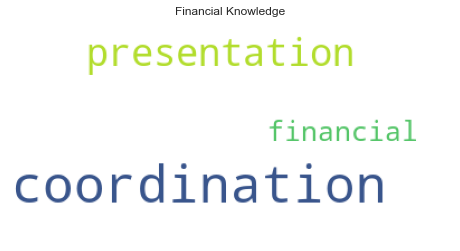

In [152]:
data_a8 = data_all[curricula_p3['Course_a8']]
print(data_a8.shape)

Cloud_a8= WordCloud(background_color="white", max_words=3).generate_from_frequencies(data_a8.T.sum(axis=1))
plt.imshow(Cloud_a8)
plt.imshow(Cloud_a8)
plt.axis("off")
plt.title("Financial Knowledge")
plt.show()
# This course's name is:
Course_a8 = 'Financial Knowledge'
# This course focus on these topics:
Course_a8_topics = ['financial','presentation','coordination']

(1289, 3)


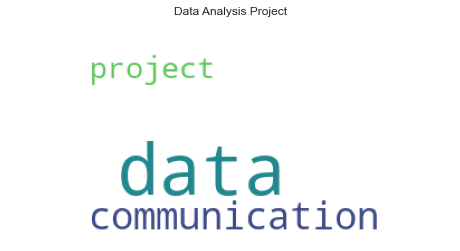

In [154]:
data_a9 = data_all[curricula_p3['Course_a9']]
print(data_a9.shape)

Cloud_a9= WordCloud(background_color="white", max_words=3).generate_from_frequencies(data_a9.T.sum(axis=1))
plt.imshow(Cloud_a9)
plt.imshow(Cloud_a9)
plt.axis("off")
plt.title("Data Analysis Project")
plt.show()
# This course's name is:
Course_a9 = 'Data Analysis Project'
# This course focus on these topics:
Course_a9_topics = ['communication','project','data']

(1289, 4)


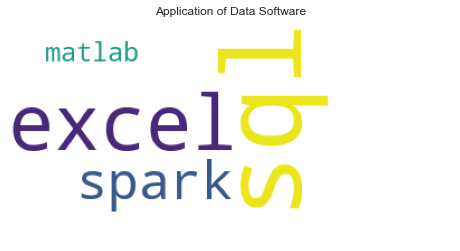

In [155]:
data_a10 = data_all[curricula_p3['Course_a10']]
print(data_a10.shape)

Cloud_a10= WordCloud(background_color="white", max_words=4).generate_from_frequencies(data_a10.T.sum(axis=1))
plt.imshow(Cloud_a10)
plt.imshow(Cloud_a10)
plt.axis("off")
plt.title("Application of Data Software")
plt.show()
# This course's name is:
Course_a10 = 'Application of Data Software'
# This course focus on these topics:
Course_a10_topics = ['sql','excel','matlab','spark']

Visualize part 4

(79, 73)


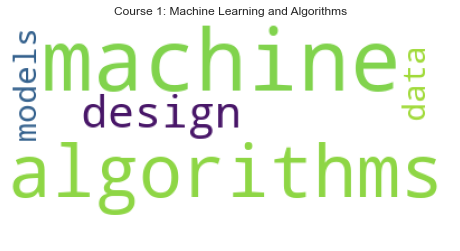

In [51]:
data0 = data_all[data_all['cluster'] == 0]
data0 = data0.iloc[:,:-1]
print(data0.shape)

# Wordcloud of cluster 0
data0.T.sum(axis=1)
Cloud0= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data0.T.sum(axis=1))
plt.imshow(Cloud0)
plt.axis("off")
plt.title("Course 1: Machine Learning and Algorithms")
plt.show()

In [72]:
Course1 = 'Machine Learning and Algorithms'

Course 1 focus on machine, algorithms, and model designing

In [75]:
Course1_topics = ['machine', 'algorithms', 'model designing']

(83, 73)


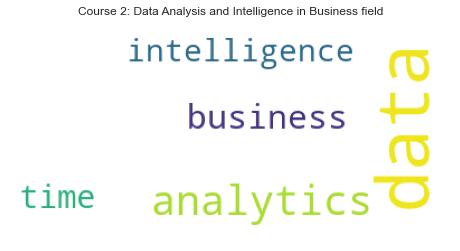

In [56]:
data1 = data_all[data_all['cluster'] == 1]
data1 = data1.iloc[:,:-1]
print(data1.shape)

# Wordcloud of cluster 1
data1.T.sum(axis=1)
Cloud1= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data1.T.sum(axis=1))
plt.imshow(Cloud1)
plt.axis("off")
plt.title("Course 2: Data Analysis and Intelligence in Business field")
plt.show()

In [76]:
Course2 = 'Data Analysis and Intelligence in Business field'

Course 2 focus on data analysis, intelligence, and business

In [77]:
Course2_topics = ['data analysis', 'intelligence', 'business']

(327, 73)


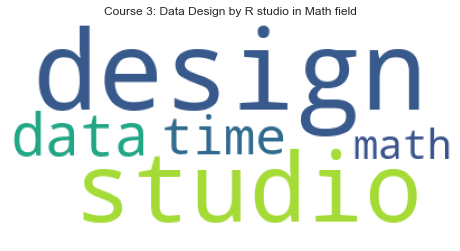

In [57]:
data2 = data_all[data_all['cluster'] == 2]
data2 = data2.iloc[:,:-1]
print(data2.shape)

# Wordcloud of cluster 2
data2.T.sum(axis=1)
Cloud2= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data2.T.sum(axis=1))
plt.imshow(Cloud2)
plt.axis("off")
plt.title("Course 3: Data Design by R studio in Math field")
plt.show()

In [78]:
Course3 = 'Data Design by R studio in Math field'

Course 3 focus on R studio application, design model to train data in math field.

In [79]:
Course3_topics = ['R studio application', 'design model', 'train data', 'math']

(162, 73)


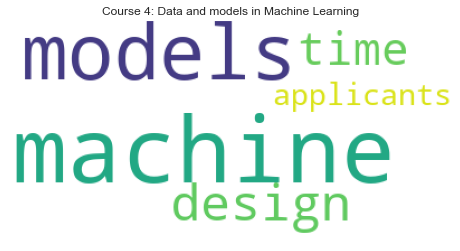

In [58]:
data3 = data_all[data_all['cluster'] == 3]
data3 = data3.iloc[:,:-1]
print(data3.shape)

# Wordcloud of cluster 3
data3.T.sum(axis=1)
Cloud3= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data3.T.sum(axis=1))
plt.imshow(Cloud3)
plt.axis("off")
plt.title("Course 4: Data and models in Machine Learning")
plt.show()

In [80]:
Course4 = 'Data and models in Machine Learning'

Course 4 focus on machine learning, models designing, and data testing.

In [81]:
Course4_topics = ['machine learning', 'models designing', 'data testing']

(68, 73)


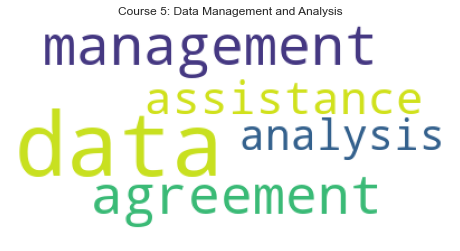

In [59]:
data4 = data_all[data_all['cluster'] == 4]
data4 = data4.iloc[:,:-1]
print(data4.shape)

# Wordcloud of cluster 4
data4.T.sum(axis=1)
Cloud4= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data4.T.sum(axis=1))
plt.imshow(Cloud4)
plt.axis("off")
plt.title("Course 5: Data Management and Analysis")
plt.show()

In [82]:
Course5 = 'Data Management and Analysis'

Course 5 focus on data management, data analysis, and assistance in group project.

In [83]:
Course5_topics = ['data management', 'data analysis', 'assistance in group project']

(186, 73)


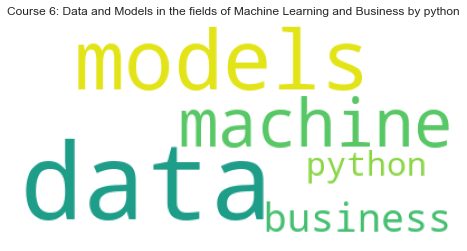

In [60]:
data5 = data_all[data_all['cluster'] == 5]
data5 = data5.iloc[:,:-1]
print(data5.shape)

# Wordcloud of cluster 5
data5.T.sum(axis=1)
Cloud5= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data5.T.sum(axis=1))
plt.imshow(Cloud5)
plt.axis("off")
plt.title("Course 6: Data and Models in the fields of Machine Learning and Business by python")
plt.show()

In [84]:
Course6 = 'Data and Models in the fields of Machine Learning and Business by python'

Course 6 focus on creating models to process data in Machine Learning and Business by python.

In [85]:
Course6_topics = ['creating models', 'process data', 'Machine Learning', 'Business', 'python']

(78, 73)


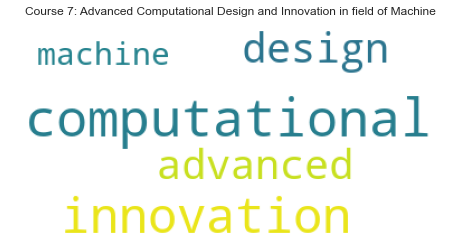

In [65]:
data6 = data_all[data_all['cluster'] == 6]
data6 = data6.iloc[:,:-1]
print(data6.shape)

# Wordcloud of cluster 6
data6.T.sum(axis=1)
Cloud6= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data6.T.sum(axis=1))
plt.imshow(Cloud6)
plt.axis("off")
plt.title("Course 7: Advanced Computational Design and Innovation in field of Machine")
plt.show()

In [86]:
Course7 = 'Advanced Computational Design and Innovation in field of Machine'

Course 7 focus on advanced computational design, innovation in field of machine.

In [88]:
Course7_topics = ['advanced computational design', 'innovation', 'machine']

(99, 73)


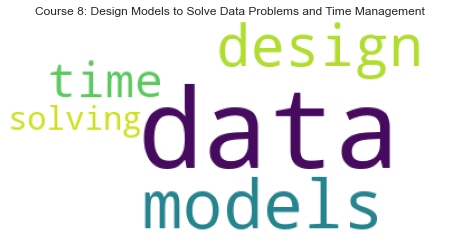

In [64]:
data7 = data_all[data_all['cluster'] == 7]
data7 = data7.iloc[:,:-1]
print(data7.shape)

# Wordcloud of cluster 7
data7.T.sum(axis=1)
Cloud7= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data7.T.sum(axis=1))
plt.imshow(Cloud7)
plt.axis("off")
plt.title("Course 8: Design Models to Solve Data Problems and Time Management")
plt.show()

In [89]:
Course8 = 'Design Models to Solve Data Problems and Time Management'

Course 8 focus on models designing and time management in project.

In [90]:
Course8_topics = ['models designing', 'time management', 'project']

(82, 73)


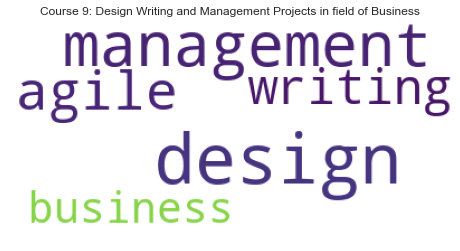

In [68]:
data8 = data_all[data_all['cluster'] == 8]
data8 = data8.iloc[:,:-1]
print(data8.shape)

# Wordcloud of cluster 8
data8.T.sum(axis=1)
Cloud8= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data8.T.sum(axis=1))
plt.imshow(Cloud8)
plt.axis("off")
plt.title("Course 9: Design Writing and Management Projects in field of Business")
plt.show()

In [91]:
Course9 = 'Design Writing and Management Projects in field of Business'

Course 9 focus on writing business project and management project.

In [92]:
Course9_topics = ['writing', 'business project', 'management project']

(81, 73)


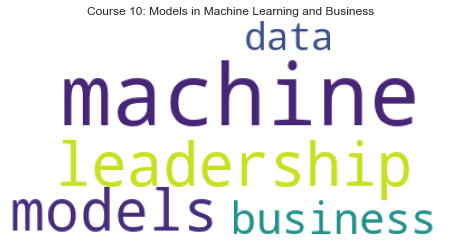

In [69]:
data9 = data_all[data_all['cluster'] == 9]
data9 = data9.iloc[:,:-1]
print(data9.shape)

# Wordcloud of cluster 9
data9.T.sum(axis=1)
Cloud9= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data9.T.sum(axis=1))
plt.imshow(Cloud9)
plt.axis("off")
plt.title("Course 10: Models in Machine Learning and Business")
plt.show()

In [93]:
Course10 = 'Models in Machine Learning and Business'

Course 10 focus on machine learning, business, leadership in group, and data process.

In [94]:
Course10_topics = ['machine learning', 'business', 'leadership in group', 'data process']

(44, 73)


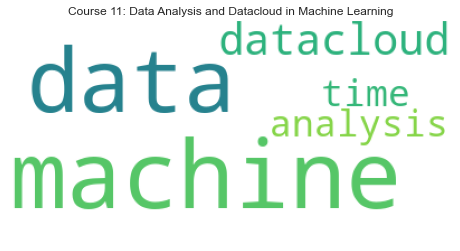

In [71]:
data10 = data_all[data_all['cluster'] == 10]
data10 = data10.iloc[:,:-1]
print(data10.shape)

# Wordcloud of cluster 10
data10.T.sum(axis=1)
Cloud10= WordCloud(background_color="white", max_words=5).generate_from_frequencies(data10.T.sum(axis=1))
plt.imshow(Cloud10)
plt.axis("off")
plt.title("Course 11: Data Analysis and Datacloud in Machine Learning")
plt.show()

In [95]:
Course11 = 'Data Analysis and Datacloud in Machine Learning'

Course 11 focus on data analysis, datacloud, time management, and machine learning.

In [96]:
Course11_topics = ['data analysis', 'datacloud', 'time management', 'machine learning']

In [48]:
# Discuss and compare your course curriculum from Section 3 and from Section 4. 

### Part 3:
Based on plot of dengrograms, there should be 10 course since the vertical line cuts 10 horizontal lines.
According to the dengrograms, I found many courses contain one topic only.
And some courses contain lots of unrelated topics.
I redesign the curriculum by myself, distribute 3 to 4 related topics to each course.

### Part 4:
Based on KNN, there are 11 clusters / 11 courses, which are designed by model directly.
This method is more accurate and smarter than that in part 3.
I found most topics are related with each other in each course in part 4, but there are some similar topics between courses.

Overall, I choose outputs from part 4 as my final curriculum design.

In [36]:
# Present and justify your final course  curriculum. 
# You  may  select  curriculum  from  Section 3  or  from  Section 4  as  your  final 
# course  curriculum. If you design  and justify a creative  way to combine results of two clustering 
# algorithms into final course curriculum you will get one bonus point (your max assignment mark 
# cannot exceed 15 pts, including bonus).

In [163]:
print("Course1's name and topics:")
print(Course1)
print(Course1_topics)

print("Course2's name and topics:")
print(Course2)
print(Course2_topics)

print("Course3's name and topics:")
print(Course3)
print(Course3_topics)

print("Course4's name and topics:")
print(Course4)
print(Course4_topics)

print("Course5's name and topics:")
print(Course5)
print(Course5_topics)

print("Course6's name and topics:")
print(Course6)
print(Course6_topics)

print("Course7's name and topics:")
print(Course7)
print(Course7_topics)

print("Course8's name and topics:")
print(Course8)
print(Course8_topics)

print("Course9's name and topics:")
print(Course9)
print(Course9_topics)

print("Course10's name and topics:")
print(Course10)
print(Course10_topics)

print("Course11's name and topics:")
print(Course11)
print(Course11_topics)

Course1's name and topics:
Machine Learning and Algorithms
['machine', 'algorithms', 'model designing']
Course2's name and topics:
Data Analysis and Intelligence in Business field
['data analysis', 'intelligence', 'business']
Course3's name and topics:
Data Design by R studio in Math field
['R studio application', 'design model', 'train data', 'math']
Course4's name and topics:
Data and models in Machine Learning
['machine learning', 'models designing', 'data testing']
Course5's name and topics:
Data Management and Analysis
['data management', 'data analysis', 'assistance in group project']
Course6's name and topics:
Data and Models in the fields of Machine Learning and Business by python
['creating models', 'process data', 'Machine Learning', 'Business', 'python']
Course7's name and topics:
Advanced Computational Design and Innovation in field of Machine
['advanced computational design', 'innovation', 'machine']
Course8's name and topics:
Design Models to Solve Data Problems and Time 